<a href="https://colab.research.google.com/github/moronya/BreastCancer/blob/develop/breastCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import necessary libraries


In [ ]:
from tensorflow import keras
from keras import layers, models
import os, shutil
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# load data from local disk and create partitions i.e train and validation folders
original_dataset = "/content/gdrive/My Drive/Breast Cancer Images"
base_dir = "C:/Users/Amos/Documents/Models/Partitioned" # The folder will store partitioned data
os.makedirs(base_dir, exist_ok = True)
train_dir = os.path.join(base_dir, "training")
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, "validation")
os.mkdir(validation_dir)

In [ ]:
# Move data to their respective partitions
train_normal_dir = os.path.join(train_dir, 'normal')
os.mkdir(train_normal_dir)
train_benign_dir = os.path.join(train_dir, 'benign')
os.mkdir(train_benign_dir)
train_malignant_dir = os.path.join(train_dir, 'malignant')
os.mkdir(train_malignant_dir)

validate_normal_dir = os.path.join(validation_dir, 'normal')
os.mkdir(validate_normal_dir)
validate_benign_dir = os.path.join(validation_dir, 'benign')
os.mkdir(validate_benign_dir)
validate_malignant_dir = os.path.join(validation_dir, 'malignant')
os.mkdir(validate_malignant_dir)

In [ ]:
# Loading the data
# Copy the first 100 images to train_normal_dir
fnames = ['normal ({}).png'.format(i) for i in range(1, 101)]
for fname in fnames:
  src = os.path.join(original_dataset+"/normal",fname)
  dst = os.path.join(train_normal_dir, fname)
  shutil.copyfile(src, dst)
fnames = ['normal ({})_mask.png'.format(i) for i in range(1, 101)]
for fname in fnames:
  src = os.path.join(original_dataset+"/normal",fname)
  dst = os.path.join(train_normal_dir, fname)
  shutil.copyfile(src, dst)

In [ ]:
# Copy the remaining 33 images to validate_normal_dir
fnames = ['normal ({}).png'.format(i) for i in range(101, 134)]
for fname in fnames:
  src = os.path.join(original_dataset+"/normal",fname)
  dst = os.path.join(validate_normal_dir, fname)
  shutil.copyfile(src, dst)
fnames = ['normal ({})_mask.png'.format(i) for i in range(101, 134)]
for fname in fnames:
  src = os.path.join(original_dataset+"/normal",fname)
  dst = os.path.join(validate_normal_dir, fname)
  shutil.copyfile(src, dst)

In [ ]:
# Benign Data
# Copy the first 300 images to train_benign_dir
fnames = ['benign ({}).png'.format(i) for i in range(1, 301)]
for fname in fnames:
  src = os.path.join(original_dataset+"/benign",fname)
  dst = os.path.join(train_benign_dir, fname)
  if(os.path.exists(src)):
    shutil.copyfile(src, dst)
fnames = ['benign ({})_mask.png'.format(i) for i in range(1, 301)]
for fname in fnames:
  src = os.path.join(original_dataset+"/benign",fname)
  dst = os.path.join(train_benign_dir, fname)
  if(os.path.exists(src)):
    shutil.copyfile(src, dst)


In [ ]:
# Copy the remaning 127 images to validate_benign_dir
fnames = ['benign ({}).png'.format(i) for i in range(301, 438)]
for fname in fnames:
  src = os.path.join(original_dataset+"/benign",fname)
  dst = os.path.join(validate_benign_dir, fname)
  if(os.path.exists(src)):
    shutil.copyfile(src, dst)
fnames = ['benign ({})_mask.png'.format(i) for i in range(301, 438)]
for fname in fnames:
  src = os.path.join(original_dataset+"/benign",fname)
  dst = os.path.join(validate_benign_dir, fname)
  if(os.path.exists(src)):
    shutil.copyfile(src, dst)

In [ ]:
# Malignant Data
# Copy the first 150 images to train_malignant_dir
fnames = ['malignant ({}).png'.format(i) for i in range(1, 151)]
for fname in fnames:
  src = os.path.join(original_dataset+"/malignant",fname)
  dst = os.path.join(train_malignant_dir, fname)
  if(os.path.exists(src)):
    shutil.copyfile(src, dst)
fnames = ['malignant ({})_mask.png'.format(i) for i in range(1, 151)]
for fname in fnames:
  src = os.path.join(original_dataset+"/malignant",fname)
  dst = os.path.join(train_malignant_dir, fname)
  if(os.path.exists(src)):
    shutil.copyfile(src, dst)

# Copy the remaining 121 images to validate_malignant_dir
fnames = ['malignant ({}).png'.format(i) for i in range(151, 210)]
for fname in fnames:
  src = os.path.join(original_dataset+"/malignant",fname)
  dst = os.path.join(validate_malignant_dir, fname)
  if(os.path.exists(src)):
    shutil.copyfile(src, dst)
fnames = ['malignant ({})_mask.png'.format(i) for i in range(151, 210)]
for fname in fnames:
  src = os.path.join(original_dataset+"/malignant",fname)
  dst = os.path.join(validate_malignant_dir, fname)
  if(os.path.exists(src)):
    shutil.copyfile(src, dst)


In [ ]:
# Checking the total number of images in each split
print('Total training normal images :', len(os.listdir(train_normal_dir)))
print('Total training benign images: ', len(os.listdir(train_benign_dir)))
print('Total training malignant images: ', len(os.listdir(train_malignant_dir)))
print('======================================================================')
print('Total validation normal images: ', len(os.listdir(validate_normal_dir)))
print('Total validation benign images: ', len(os.listdir(validate_benign_dir)))
print('Total validation malignant images: ', len(os.listdir(validate_malignant_dir)))

Total training normal images : 200
Total training benign images:  600
Total training malignant images:  300
Total validation normal images:  66
Total validation benign images:  274
Total validation malignant images:  118


**Build the model**

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150,150,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 32)      320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 17, 17, 128)     

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 32)      320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 17, 17, 128)     

In [ ]:
from keras import optimizers
model.compile(optimizer=optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

Data preprocessing

In [ ]:
from keras.layers.preprocessing.image_preprocessing import TARGETS
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size = (150, 150),batch_size = 50, class_mode = 'categorical', color_mode="grayscale")
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size = (150, 150), batch_size = 50, class_mode = 'categorical', color_mode="grayscale")




Found 1100 images belonging to 3 classes.
Found 458 images belonging to 3 classes.


In [53]:
history = model.fit(train_generator, steps_per_epoch = 10, epochs = 20, validation_data = validation_generator, validation_steps = 10)

Epoch 1/20
10/10 [==============================] - 68s 7s/step - loss: 0.0621 - accuracy: 0.9860 - val_loss: 2.4502 - val_accuracy: 0.6485
Epoch 2/20
10/10 [==============================] - 40s 4s/step - loss: 0.0282 - accuracy: 0.9940 - val_loss: 2.3735 - val_accuracy: 0.6659
Epoch 3/20
10/10 [==============================] - 42s 4s/step - loss: 0.0727 - accuracy: 0.9800 - val_loss: 2.5675 - val_accuracy: 0.6681
Epoch 4/20
10/10 [==============================] - 45s 5s/step - loss: 0.0461 - accuracy: 0.9840 - val_loss: 2.2135 - val_accuracy: 0.6681
Epoch 5/20
10/10 [==============================] - 38s 4s/step - loss: 0.0565 - accuracy: 0.9820 - val_loss: 2.2857 - val_accuracy: 0.6594
Epoch 6/20
10/10 [==============================] - 38s 4s/step - loss: 0.0554 - accuracy: 0.9840 - val_loss: 2.3618 - val_accuracy: 0.6332
Epoch 7/20
10/10 [==============================] - 38s 4s/step - loss: 0.0332 - accuracy: 0.9880 - val_loss: 2.7866 - val_accuracy: 0.6419
Epoch 8/20
10/10 [==

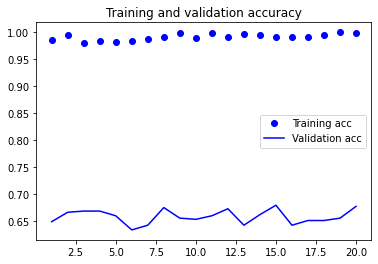

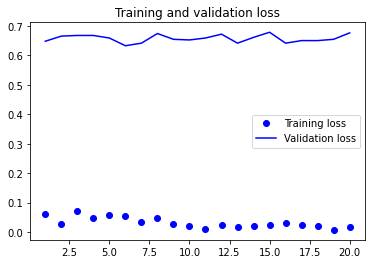

In [54]:
# Visualize
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_accuracy']
loss = history.history['loss']
epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


